# Yeast Genome Origins of Replication

In [1]:
%load_ext autoreload
%autoreload 2


# Put all your solutions into Lab1_helper.py as this script which is autograded
import Lab1_helper 

from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. 
# This is not relevant to most people because I recommended you use my server, but
# change home to where you are storing everything. Again. Not recommended.

<a href="https://www.ncbi.nlm.nih.gov/projects/sviewer/?id=NC_004070.1&v=1088..2241&mk=1588:1741|oriC|">Genome</a>

In [29]:
!head {home}/csc-448-student/data/NC_004070.1_1088..2241.fa

head: cannot open '/home/jupyter-pander14/csc-448-student/data/NC_004070.1_1088..2241.fa' for reading: No such file or directory


**Exercise 1.** Write a function that computes the average length of a Yeast chromosome.

In [16]:
from Bio import SeqIO

fasta_sequences = SeqIO.parse(open(f"{home}/csc-448-student/data/GCF_000146045.2_R64_genomic.fna"),'fasta')
s = 0
l = 0
chromosomes = []
for fasta in fasta_sequences:
    chromosomes.append(str(fasta.seq))
    s += len(str(fasta.seq))
    l += 1
    #name, sequence = fasta.id, str(fasta.seq)
s/l

715123.8235294118

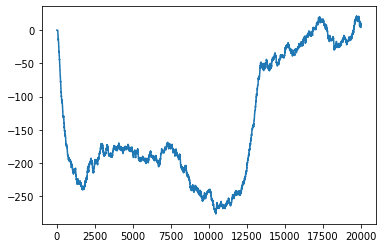

In [20]:
import Topic1_helper
import pandas as pd
ch = str(chromosomes[0])
skews = pd.Series(Topic1_helper.skew(ch[:20000]))
skews.plot.line();

In [23]:
def gc_content(seq):
    count = 0
    for c in seq:
        if c.lower() == "g" or c.lower() == "c":
            count += 1
    return count/len(seq)
gc_content(ch)

0.39270170012770506

In [24]:
gc_content(ch[650:1791])

0.3426818580192813

In [25]:
gc_content(ch[6136:7136])

0.303

In [26]:
gc_content(ch[7998:8548])

0.3836363636363636

Confirmed	I-1	ARS102	proARS102	1	650	1791
Confirmed	I-7	ARS102.5	proARS103	1	6136	7136
Confirmed	I-8	ARS103	proARS103	1	7998	8548

**Exercise 1.**
A *k*-mer is a string of length ``k``. For this exercise, define a function ``count(text, pattern)`` as the number of times that a k-mer ``pattern`` appears as a substring of ``text``. For example,

For example:
<pre>
count("ACAACTATGCATACTATCGGGAACTATCCT","ACTAT")=3.
</pre>
Please note that count("CGATATATCCATAG", "ATA") is equal to 3 (not 2) since we should account for overlapping occurrences of ``pattern`` in ``text``.

In [2]:
def count(text,pattern):
    count = 0
    # YOUR SOLUTION HERE
    return count

In [3]:
count("ACAACTATGCATACTATCGGGAACTATCCT","ACTAT")

3

### A word about embedded lab questions
In general, I will skip over most lab questions when recording and presenting unless I want them to be used as part of the lecture/discussion.

**Exercise 2.** Find the most frequent *k*-mers in a string.
* Input: A string ``text`` and an integer ``k``.
* Output: All most frequent *k*-mers in ``text`` and their count.
* Requirements: Do not use a dictionary/map

In [4]:
import numpy as np

def frequent_words(text,k):
    frequent_patterns = []
    counts = []
    # YOUR SOLUTION HERE
    return list(np.unique(frequent_patterns)),max_count

In [5]:
print(frequent_words("ACAACTATGCATACTATCGGGAACTATCCT",5))
print(frequent_words("ACAACTATGCATACTATCGGGAACTATCCT",4))

(['ACTAT'], 3)
(['ACTA', 'CTAT'], 3)


In [6]:
try:
    print('Question 1: What is the Big-O of frequent words? Define |text| as the length of text. Assume the unit of measurement is comparing a single charater (i.e., comparing ABC to DEF costs 3 units).')
    manual_answers["question_1"] = widgets.RadioButtons(
                options=[
                    '|text|^2',
                    '|text|^2*k',
                    'k^2'
                ],
                layout={'width': 'max-content'},
                value = None
            )

    display(widgets.Box(
        [
            widgets.Label(value='Answers:'),
            manual_answers["question_1"]
        ]
    ))
except:
    pass

Question 1: What is the Big-O of frequent words? Define |text| as the length of text. Assume the unit of measurement is comparing a single charater (i.e., comparing ABC to DEF costs 3 units).


Box(children=(Label(value='Answers:'), RadioButtons(layout=Layout(width='max-content'), options=('|text|^2', '…

### Now let's look at the *ori* and see what 9-mers appear

In [7]:
text = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
frequent_words(text,9)

(['atgatcaag', 'ctcttgatc', 'cttgatcat', 'tcttgatca'], 3)

Notice anything interesting about the sequences?

As previously stated, nucleotides only bind to their complement, so A and T bind and G and C bind. It is also true that DNA is read in specific direction. Very much in the same way we read left to right. DNA is read from what is called the 5' end to the 3' end.

<img src="https://image.slidesharecdn.com/dna-replication-lin-140210083429-phpapp02/95/dna-replicationlin-4-638.jpg?cb=1392021295" width=400/>

So we can now understand and look for something very important called a reverse complement. The definition of which is right there in the name. ACTG is the reverse complement of CAGT. Let's now write a simple funciton to find the reverse complement.

**Exercise 3.** Write a function that find the reverse complement of a DNA sequence.
* Input: A string ``text`` representing DNA.
* Output: The reverse complement of ``text``.

In [8]:
def reverse_complement(text):
    text = text[::-1].lower()
    chars = []
    # YOUR SOLUTION HERE
    return "".join(chars)

In [9]:
reverse_complement("cagt")

'actg'

### Back to our 9-mers

In [10]:
solutions = frequent_words(text,9)
print(solutions)
print("Reverse complement of first 9-mer:",reverse_complement(solutions[0][0]))

(['atgatcaag', 'ctcttgatc', 'cttgatcat', 'tcttgatca'], 3)
Reverse complement of first 9-mer: cttgatcat


What is interesting about the reverse complement of the first 9-mer?

### Writing faster code
**Exercise 4.** Let's now write faster code that produces a frequency map. 
* Input: A string ``text`` representing DNA and integer ``k``.
* Output: a frequency map (Python dictionary) that maps every pattern of size ``k`` to the number of times that pattern occurs.

In [11]:
def frequency_table(text,k):
    freq_map = {}
    n = len(text)
    for i in range(n-k+1):
        # YOUR SOLUTION HERE
        pass
    return freq_map

In [12]:
freq_map = frequency_table(text,3)

## A word about packages
I try to limit the number of Python packages that you need for this class. They are roughly pandas+numpy and networkx.

In your project, you are welcome to use bioinformatics Python and non-Python packages. You are encouraged to do so.

In [13]:
# I'm only using pandas here so the output is reasonable, you can remove it of course and see the full dictionary
import pandas as pd
pd.Series(frequency_table(text,3))

atc    21
tca    17
caa    12
aat    10
atg    15
       ..
gcg     4
ggg     1
cga     7
ccg     3
ccc     1
Length: 64, dtype: int64

### Write better frequent words
**Exercise 5.** Write a function that finds the frequent patterns using a dictionary/map. 
* Input: A string ``text`` representing DNA and integer ``k``.
* Output: All most frequent *k*-mers in ``text`` and their count.
* Requirements: Use your frequency_table function (i.e., use the dictionary).

In [14]:
def better_frequent_words(text,k):
    frequent_patterns = []
    freq_map = frequency_table(text,k)
    # YOUR SOLUTION HERE
    return frequent_patterns,max_value

In [15]:
better_frequent_words(text,9)

(['atgatcaag', 'ctcttgatc', 'tcttgatca', 'cttgatcat'], 3)

### Clump Finding Problem
* Imagine you are trying to find *ori* in a newly sequenced genome
* Old frequent hiddent messages won't be useful
* One solution is to use a sliding window and look for a region where a $k$-mer appears several times in short succession
* For example if TGCA forms a (25,3)-clump then it appears at least 3 times in a window of length 25

Even if we solve the clump finding problem, we still have an issue
* Specifically, for the *E. coli* genome we find hundreds of different 9-mers forming (500,3)-clumps
* This makes it absolutely unclear which of these 9-mers might represent a DnaA box in the bacterium’s *ori* region.
* Please read the next sections entitled "The Simplest Way to Replicate DNA" and "Asymmetry of Replication". Dig into the biology, but the abstract model/representation we are using in this class does not require you to understand that biology in detail. Chat with me in Slack about what you find confusing and interesting. 

### Statistics of the Foward and Reverse Half-Strands
The most important consequence for us from the discussion of DNA replication is that we now have four pieces
    1. Forward half-strand x 2
    2. Reverse half-strand x 2

<img src="http://bioinformaticsalgorithms.com/images/Replication/half_strands.png" width=400>



### Why does this matter?
Consider the genome of *Thermotoga petrophila*. If we count the nucleotides in the forward and reverse half strands, then we get the following:

<img src="http://bioinformaticsalgorithms.com/images/Replication/forward_reverse_nucleotide_counts.png" width=400>

Notice that the number of C's and G's is different in the reverse and forward half-strand. Why is this?

Take a minute to read this and then we will discuss together and then in groups depending on time:

"It turns out that we observe these discrepancies because cytosine (C) has a tendency to mutate into thymine (T) through a process called deamination. Deamination rates rise 100-fold when DNA is single-stranded, which leads to a decrease in cytosine on the forward half-strand. Also, since C-G base pairs eventually change into T-A base pairs, deamination results in the observed decrease in guanine (G) on the reverse half-strand (recall that a forward parent half-strand synthesizes a reverse daughter half-strand, and vice-versa)." - Bioinformatics Algorithms 3rd Edition

### Minimum skew problem
We can use this statistic to find the *ori*.

Our idea is to traverse the genome, keeping a running total of the difference between the counts of G and C. If this difference starts increasing, then we guess we are on the forward half-strand. If this difference starts decreasing, then we guess that we are on the reverse half-strand.


<img src="http://bioinformaticsalgorithms.com/images/Replication/increasing_decreasing_skew.png" width=600>


We define $Skew_i(Genome)$ as the difference between the total number of occurrences of G and the total number of occurrences of C in the first $i$ nucleotides of Genome. 

Note that we can compute $Skew_i(Genome)$ incrementally.  

If the next nucleotide is G, then $Skew_{i+1}(Genome)$ = $Skew_i(Genome)$ + 1

if this nucleotide is C, then $Skew_{i+1}(Genome)$ = $Skew_i(Genome)$ – 1

otherwise, $Skew_{i+1}(Genome)$ = $Skew_i(Genome)$.

**Exercise 6:** Compute the skew at every position of a Genome

Input: A DNA string Genome.

Output: An array that computes the $Skew_i(Genome)$. You can assume $Skew_0(Genome)$=0

In [3]:
def skew(genome):
    skews = [0]
    # YOUR SOLUTION HERE
    return skews

### Reading in the *E coli* genome
I'll do this for you.

In [4]:
import pandas as pd
data = pd.read_table("http://bioinformaticsalgorithms.com/data/realdatasets/Rearrangements/E_coli.txt",header=None)
genome = data.values[0,0]

In [6]:
skews = skew(genome)

In [7]:
# Again I'm using pandas because the display would be horrible otherwise.
# I will either give you the pandas code or teach you that pandas/numpy code
skews = pd.Series(skew(genome))
skews

0             0
1             0
2             1
3             0
4             0
           ... 
4639671   -2630
4639672   -2630
4639673   -2630
4639674   -2630
4639675   -2631
Length: 4639676, dtype: int64

<AxesSubplot:>

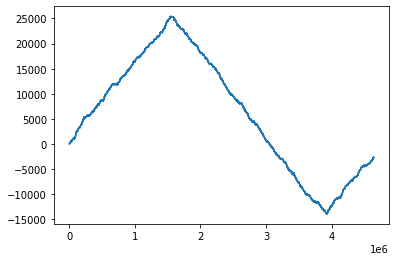

In [8]:
%matplotlib inline
skews.plot.line()

Where do you think the *ori* is located?

In [21]:
print('Position:',skews.idxmin()+1)

Position: 3923621


In [22]:
# Don't forget to push!